In [1]:
import pandas as pd
# Our scripts
import sys  
sys.path.insert(0, '../src')
import patterns_analysis as pa
%load_ext autoreload
%autoreload 2

## How K_ac patterns affects population structure

### Produce dataframe of model dynamics with different patterned matrices

In [2]:
sizes = 4
num = 50
lower, upper = 0.001, 0.01
patterns = ['null', 'ident', 'naive', 'immune', 
            'barbell', 'cycle', 'complete', 'star']
end_time = 200

results = pa.analyze(sizes,
                     num,
                     lower,
                     upper,
                     patterns,
                     end_time)
print(results.shape)
results.to_csv('../Data/pattern_analysis_test.tsv', sep='\t', index=False)
results.head()

pattern:   0%|          | 0/8 [00:00<?, ?it/s]

init:   0%|          | 0/50 [00:00<?, ?it/s]

init:   0%|          | 0/50 [00:00<?, ?it/s]

init:   0%|          | 0/50 [00:00<?, ?it/s]

init:   0%|          | 0/50 [00:00<?, ?it/s]

init:   0%|          | 0/50 [00:00<?, ?it/s]

init:   0%|          | 0/50 [00:00<?, ?it/s]

init:   0%|          | 0/50 [00:00<?, ?it/s]

init:   0%|          | 0/50 [00:00<?, ?it/s]

(400, 7)


,growth_rate,has_grown,euclidian,shannon_index,bray_curtis,init,pattern
0,0.005050,1.0,0.012473,-2.220446e-16,3.330669e-16,0,null
1,0.003849,1.0,0.009792,0.000000e+00,2.220446e-16,1,null
2,0.003428,1.0,0.008978,0.000000e+00,2.220446e-16,2,null
3,0.003869,1.0,0.010015,0.000000e+00,2.220446e-16,3,null
4,0.001511,1.0,0.004964,-2.220446e-16,1.110223e-16,4,null


In [3]:
df = pd.read_csv('../Data/pattern_analysis.tsv', sep='\t',
                 dtype={'pattern': 'string'},
                 keep_default_na=False)
#df = df.drop(['bray_curtis', 'skew'], axis=1)
ids = ['init', 'pattern']
#ncols = list(set(df.columns)-set(ids))
#df[ncols] = (df[ncols] - df[ncols].min())/(df[ncols].max() - df[ncols].min())
df = pd.melt(df,
             id_vars=ids,
             var_name='statistic',
             value_name='value')
df.head()

,init,pattern,statistic,value
0,0,null,growth_rate,0.003140
1,1,null,growth_rate,0.001973
2,2,null,growth_rate,0.002255
3,3,null,growth_rate,0.006164
4,4,null,growth_rate,0.013104


/home/sidreed/anaconda3/envs/proj_02712/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/home/sidreed/anaconda3/envs/proj_02712/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/home/sidreed/anaconda3/envs/proj_02712/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/home/sidreed/anaconda3/envs/proj_02712/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


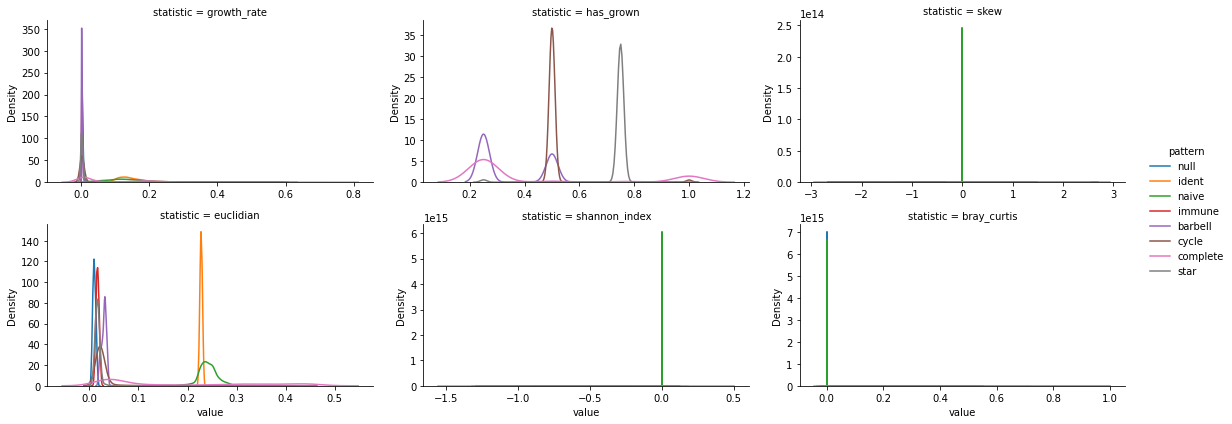

In [4]:
import seaborn as sns
plot = sns.FacetGrid(df, col='statistic', hue='pattern', col_wrap=3, 
                     aspect=16/9, sharex=False, sharey=False)
plot.map_dataframe(sns.kdeplot, x='value')
plot.add_legend()
plot.tight_layout()
plot.fig.savefig('../Documents/figures/pattern_analysis.png')